# House Price Prediction Competition Solution

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Data exploration


In [3]:
housing_prices = pd.read_csv('./dataset/train.csv')

In [4]:
y = housing_prices.SalePrice

# Features: lot area, year build, 1st floor square feet, 2nd floor square feet, full bathrooms above grade, 
#           bedrooms above grade, total rooms above grade
# grade = real estate term for above ground level
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = housing_prices[features]

In [5]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [6]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [7]:
# Split the training data to train and validate a model
train_X, validation_X, train_y, validation_y = train_test_split(X, y, random_state = 1)


# Finding the optimal number of leaves


In [8]:
def get_mae(max_leaf_nodes, train_X, validation_X, train_y, validation_y):
    model = RandomForestRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 1)
    model.fit(train_X, train_y)
    validation_prediction = model.predict(validation_X)
    mae = mean_absolute_error(validation_y, validation_prediction)
    
    return(mae)

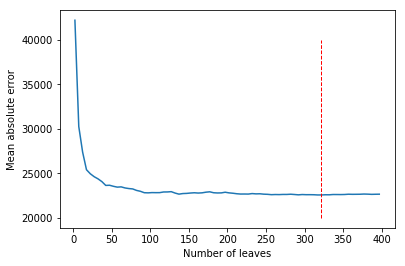

In [9]:
error_history = []
leaf_nodes = list(range(2, 400, 5))

for max_leaf_nodes in leaf_nodes:
    current_mae = get_mae(max_leaf_nodes, train_X, validation_X, train_y, validation_y)
    error_history.append(current_mae)

# The global minimum
optimal_number_of_nodes = leaf_nodes[error_history.index(sorted(error_history)[0])]

# Graphed line of the cost
plt.plot(leaf_nodes, error_history)
plt.xlabel('Number of leaves')
plt.ylabel('Mean absolute error')

# Global minimum marker
plt.plot([optimal_number_of_nodes, optimal_number_of_nodes], [20000, 40000], c = 'r', linewidth = 1, linestyle = 'dashed')

plt.show()   

# Model fitting, measuring error, and making predictions

In [10]:
model = RandomForestRegressor(max_leaf_nodes = optimal_number_of_nodes, random_state = 1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=322,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### Mean absolute error for the validation data:

In [11]:
validation_predictions = model.predict(validation_X)
mean_absolute_error(validation_y, validation_predictions)

10165.592580046352

In [12]:
for validation_prediction in range(5):
    print(validation_prediction, '      {0:.0f}'.format(validation_predictions[validation_prediction]))

0       220829
1       155974
2       127043
3       82231
4       144107


In [13]:
validation_y.head()

258     231500
267     179500
288     122000
649      84500
1233    142000
Name: SalePrice, dtype: int64

### Mean absolute error for the train and validation data

In [14]:
predictions = model.predict(X)
mean_absolute_error(y, predictions)

10750.43315298467

### Predictions and targets

In [15]:
# Predictions
for prediction in range(5):
    print(prediction, '   {0:.0f}'.format(predictions[prediction]))

0    200313
1    170100
2    222371
3    150838
4    276857


In [16]:
# Targets
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Making final predictions from test data

In [17]:
test_data = pd.read_csv('./dataset/test.csv')

In [18]:
test_X = test_data[features]
predicted_prices = model.predict(test_X)
predicted_prices[:5]

array([113798.19502801, 151144.78523392, 173526.21687231, 177497.15824751,
       183113.89105339])

In [19]:
# Preperation for submission
my_submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission.csv', index=False)